In [1]:
# Defining linear regression for CMOR 438 Data Set

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def ols_estimate(x,y):
    xbar = np.mean(x)
    ybar = np.mean(y)
    ssy = sum((x-xbar)*(y-ybar))
    ssx = sum((x-xbar)*(x-xbar))
    b1 = ssy/ssx
    b0 = ybar - b1*xbar
    return b0,b1

In [4]:
x = np.array([1,2.4,3,-2,3,4,5])
y = np.array([-0.5, 2, -2.3, -4, 4,5, 9])

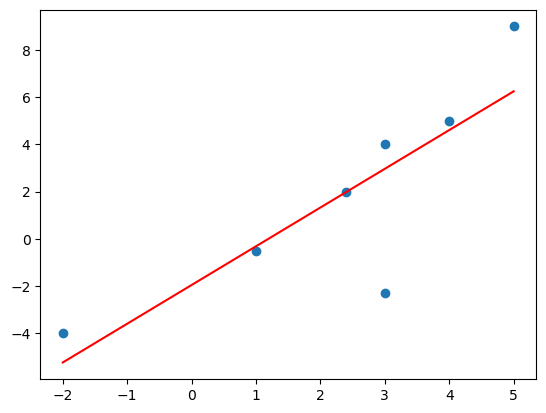

In [5]:
b0,b1 = ols_estimate(x,y)

# Plotting line of best fit

x_fit = np.linspace(min(x), max(x), 100)  
y_fit = b0 + b1 * x_fit  
plt.plot(x_fit, y_fit, color='red', label='Best fit line')

# Plotting scatter plot data
plt.scatter(x,y)